In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

un data set avec toutes les variables 
un data set avec les variables qu'on a selectionnées 

In [2]:
df = pd.read_csv('train_synop_merged_inner.csv')

print(f"Shape du dataset : {df.shape}")
print(f"\nColonnes : {df.columns.tolist()}")
print(f"\nInfos générales :")
print(df.info())

Shape du dataset : (9195, 37)

Colonnes : ['Id', 'week', 'region_code', 'region_name', 'TauxGrippe', 'week_year', 'tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'n', 'nbas', 'hbas', 'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol', 'tw', 'raf10', 'rafper', 'per', 'ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24']

Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           9195 non-null   int64  
 1   week         9195 non-null   int64  
 2   region_code  9195 non-null   int64  
 3   region_name  9195 non-null   object 
 4   TauxGrippe   9195 non-null   int64  
 5   week_year    9195 non-null   int64  
 6   tend         9195 non-null   float64
 7   dd           9195 non-null   float64
 8   ff           9195 non-null   float64
 9   t            9195 non-null   float64
 10  td  

une colonne week et une week_year donc on supprime une des deux 

In [3]:
if 'week' in df.columns:
    df = df.drop(columns=['week'])
    print(f"   Colonne 'week' supprimée")
    print(f"   Nouvelles colonnes : {df.columns.tolist()}")

   Colonne 'week' supprimée
   Nouvelles colonnes : ['Id', 'region_code', 'region_name', 'TauxGrippe', 'week_year', 'tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'n', 'nbas', 'hbas', 'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol', 'tw', 'raf10', 'rafper', 'per', 'ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24']


On analyse les valeurs manquantes (NaN)

In [4]:
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"\n{missing_data}")

#les variables avec plus de 30% de données manquantes ==> à supprimer 
cols_to_drop = missing_data[missing_data['Missing_Percent'] > 30]['Column'].tolist()
print(f"   {cols_to_drop}")
print(f"\n   Nombre de colonnes avec <30% {len(cols_to_drop)}")


              Column  Missing_Count  Missing_Percent
tend24        tend24           9195           100.00
tn24            tn24           9195           100.00
tx24            tx24           9195           100.00
tw                tw           9195           100.00
niv_bar      niv_bar           8435            91.73
geop            geop           8434            91.72
raf10          raf10           5315            57.80
perssfrai  perssfrai           2426            26.38
ssfrai        ssfrai           2426            26.38
rr1              rr1            611             6.64
nbas            nbas            121             1.32
ht_neige    ht_neige             77             0.84
rafper        rafper             16             0.17
per              per             16             0.17
n                  n              5             0.05
tminsol      tminsol              3             0.03
rr24            rr24              3             0.03
tx12            tx12              1          

On suppriume les colonnes avec >30% NaN

In [5]:
df_clean = df.drop(columns=cols_to_drop)
print(f"   Avant : {df.shape[1]} colonnes")
print(f"   Après : {df_clean.shape[1]} colonnes")

print(f"\n Colonnes restantes ({df_clean.shape[1]}) :")
print(f"   {df_clean.columns.tolist()}")

   Avant : 36 colonnes
   Après : 29 colonnes

 Colonnes restantes (29) :
   ['Id', 'region_code', 'region_name', 'TauxGrippe', 'week_year', 'tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'n', 'nbas', 'hbas', 'pres', 'tn12', 'tx12', 'tminsol', 'rafper', 'per', 'ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24']


Conversion des types de colonnes

In [6]:
print("🔄 Conversion des types de colonnes...")

# Convertir les types de colonnes
# week_year est un identifiant semaine au format AAAASS
# On crée une colonne datetime réelle basée sur le code semaine

def week_to_datetime(week_str):
    """Convertit 'AAAASS' (année + semaine) en première date de la semaine"""
    year = int(str(week_str)[:4])
    week = int(str(week_str)[4:6])
    # Première date de la semaine (lundi)
    from datetime import datetime
    jan4 = datetime(year, 1, 4)
    week_one_monday = jan4 - pd.Timedelta(days=jan4.weekday())
    week_start = week_one_monday + pd.Timedelta(weeks=week-1)
    return week_start

# Créer une vraie colonne datetime basée sur week_year
df_clean['date'] = df_clean['week_year'].apply(week_to_datetime)
df_clean['date'] = pd.to_datetime(df_clean['date'])

print(f"\n📝 Types avant conversion :")
print(df.dtypes.value_counts())

print(f"\n✅ Types après conversion :")
print(df_clean[['date', 'week_year', 'region_code']].dtypes)

print(f"\n🔍 Infos finales df_clean :")
print(df_clean.info())

🔄 Conversion des types de colonnes...

📝 Types avant conversion :
float64    31
int64       4
object      1
Name: count, dtype: int64

✅ Types après conversion :
date           datetime64[ns]
week_year               int64
region_code             int64
dtype: object

🔍 Infos finales df_clean :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           9195 non-null   int64         
 1   region_code  9195 non-null   int64         
 2   region_name  9195 non-null   object        
 3   TauxGrippe   9195 non-null   int64         
 4   week_year    9195 non-null   int64         
 5   tend         9195 non-null   float64       
 6   dd           9195 non-null   float64       
 7   ff           9195 non-null   float64       
 8   t            9195 non-null   float64       
 9   td           9195 non-null   float64       
 10  u     

Traitement des valeurs manquantes restantes

In [7]:
# Analyser les NaN restants
remaining_missing = df_clean.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)

print("Valeurs manquantes après suppression des colonnes :")
print(remaining_missing)

# Imputation par la médiane pour les colonnes numériques
print(f"\n Imputation par médiane (colonnes numériques)...")
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"   {col} : {median_val:.2f}")

print(f"\n Aucune valeur manquante restante : {df_clean.isnull().sum().sum() == 0}")
print(f"\n Aperçu final du dataset :")
print(df_clean.describe())

Valeurs manquantes après suppression des colonnes :
ssfrai       2426
perssfrai    2426
rr1           611
nbas          121
ht_neige       77
rafper         16
per            16
n               5
tminsol         3
rr24            3
hbas            1
tn12            1
tx12            1
rr12            1
dtype: int64

 Imputation par médiane (colonnes numériques)...
   n : 68.76
   nbas : 4.10
   hbas : 1533.81
   tn12 : 281.89
   tx12 : 288.61
   tminsol : 279.08
   rafper : 6.32
   per : -10.00
   ht_neige : 0.00
   ssfrai : 0.00
   perssfrai : -45.00
   rr1 : 0.05
   rr12 : 0.63
   rr24 : 1.26

 Aucune valeur manquante restante : True

 Aperçu final du dataset :
                 Id  region_code   TauxGrippe      week_year         tend  \
count   9195.000000  9195.000000  9195.000000    9195.000000  9195.000000   
mean   10120.467428    51.364763    77.562697  200776.152365    -0.068657   
min     5523.000000    11.000000     0.000000  200401.000000   -81.964286   
25%     7821.500000 

On vérifie la fréquence des données

In [8]:
print(f"\nPériode couverte :")
print(f"   Du : {df_clean['date'].min()}")
print(f"   Au : {df_clean['date'].max()}")
print(f"   Total : {(df_clean['date'].max() - df_clean['date'].min()).days} jours\n")

# Vérifier que chaque région a les mêmes semaines
print("Distribution par région :")
region_counts = df_clean['region_code'].value_counts().sort_index()
print(f"   {region_counts.describe()}\n")

# Vérifier qu'il n'y a pas de doublons (region + semaine)
print(f"Vérification des doublons (region_code + week_year) :")
duplicates = df_clean.duplicated(subset=['region_code', 'week_year'], keep=False)
print(f"   Doublons trouvés : {duplicates.sum()}\n")

# Afficher les semaines disponibles
print(f"Semaines disponibles : {sorted(df_clean['week_year'].unique())[:10]}... ({len(df_clean['week_year'].unique())} semaines)")


Période couverte :
   Du : 2003-12-29 00:00:00
   Au : 2011-12-26 00:00:00
   Total : 2919 jours

Distribution par région :
   count     22.000000
mean     417.954545
std        0.213201
min      417.000000
25%      418.000000
50%      418.000000
75%      418.000000
max      418.000000
Name: count, dtype: float64

Vérification des doublons (region_code + week_year) :
   Doublons trouvés : 0

Semaines disponibles : [np.int64(200401), np.int64(200402), np.int64(200403), np.int64(200404), np.int64(200405), np.int64(200406), np.int64(200407), np.int64(200408), np.int64(200409), np.int64(200410)]... (418 semaines)


On créée la colonne saison

In [10]:
def get_season(date):
    """Détermine la saison en fonction du mois"""
    month = date.month
    if month in [12, 1, 2]:
        return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Ete'
    else:  # 9, 10, 11
        return 'Automne'

df_clean['saison'] = df_clean['date'].apply(get_season)

print(df_clean['saison'].value_counts())

print(df_clean[['date', 'saison']].head)

saison
Printemps    2332
Ete          2310
Automne      2287
Hiver        2266
Name: count, dtype: int64
<bound method NDFrame.head of            date saison
0    2011-12-26  Hiver
1    2011-12-26  Hiver
2    2011-12-26  Hiver
3    2011-12-26  Hiver
4    2011-12-26  Hiver
...         ...    ...
9190 2003-12-29  Hiver
9191 2003-12-29  Hiver
9192 2003-12-29  Hiver
9193 2003-12-29  Hiver
9194 2003-12-29  Hiver

[9195 rows x 2 columns]>


sauvegarde df avec toutes les variables 

In [17]:
output_file = 'train_synop_cleaned_full_variables.csv'
df_clean.to_csv(output_file, index=False)

print(f"Dataset nettoyé sauvegardé : {output_file}")
print(f"   Shape : {df_clean.shape}")
print(f"   Colonnes : {df_clean.columns.tolist()}")

print(df_clean.head())

Dataset nettoyé sauvegardé : train_synop_cleaned_full_variables.csv
   Shape : (9195, 31)
   Colonnes : ['Id', 'region_code', 'region_name', 'TauxGrippe', 'week_year', 'tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'n', 'nbas', 'hbas', 'pres', 'tn12', 'tx12', 'tminsol', 'rafper', 'per', 'ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'date', 'saison']
     Id  region_code      region_name  TauxGrippe  week_year       tend  \
0  5523           42           ALSACE          66     201152 -41.250000   
1  5524           72        AQUITAINE          24     201152 -36.211039   
2  5525           83         AUVERGNE          91     201152 -32.678571   
3  5526           25  BASSE-NORMANDIE          49     201152 -51.388528   
4  5527           26        BOURGOGNE          33     201152 -40.000000   

           dd        ff           t          td  ...  ht_neige  ssfrai  \
0  207.321429  3.500000  279.192857  276.548214  ...       0.0     0.0   
1  187.271104  2.715390  280

In [18]:
#matrice de corrélation de sylia

# Variables sélectionnées basées sur la matrice de corrélation
variables_selectionnees = ['tminsol', 'nbas', 'n', 'td', 'ff', 't', 'u', 'vv']

print(f"\nVariables à conserver (groupe réduit) :")
print(f"  - tminsol : température min du sol")
print(f"  - nbas : nébulosité des nuages niveau inférieur")
print(f"  - n : nébulosité totale")
print(f"  - td : point de rosée")
print(f"  - ff : vitesse du vent")
print(f"  - t : température")
print(f"  - u : humidité")
print(f"  - vv : visibilité horizontale")

# Vérifier que toutes les variables existent dans df_clean
variables_disponibles = [var for var in variables_selectionnees if var in df_clean.columns]
variables_manquantes = [var for var in variables_selectionnees if var not in df_clean.columns]

print(f"\nVariables trouvées : {len(variables_disponibles)}/{len(variables_selectionnees)}")
if variables_manquantes:
    print(f"Variables non trouvées : {variables_manquantes}")

# Créer df_reduit avec uniquement les variables sélectionnées
# Conserver aussi les colonnes nécessaires (Id, date, region, TauxGrippe, week_year, saison)
colonnes_obligatoires = ['Id', 'region_code', 'region_name', 'TauxGrippe', 'week_year', 'date', 'saison']
df_reduit = df_clean[colonnes_obligatoires + variables_disponibles].copy()

print(f"\nDataset complet : {df_clean.shape}")
print(f"Dataset réduit (variables sélectionnées) : {df_reduit.shape}")
print(f"Colonnes du dataset réduit : {df_reduit.columns.tolist()}")


Variables à conserver (groupe réduit) :
  - tminsol : température min du sol
  - nbas : nébulosité des nuages niveau inférieur
  - n : nébulosité totale
  - td : point de rosée
  - ff : vitesse du vent
  - t : température
  - u : humidité
  - vv : visibilité horizontale

Variables trouvées : 8/8

Dataset complet : (9195, 31)
Dataset réduit (variables sélectionnées) : (9195, 15)
Colonnes du dataset réduit : ['Id', 'region_code', 'region_name', 'TauxGrippe', 'week_year', 'date', 'saison', 'tminsol', 'nbas', 'n', 'td', 'ff', 't', 'u', 'vv']


sauvegarde df avec toutes les 15 variables 

In [24]:
# Enregistrer le dataset réduit
nom_fichier_reduit = 'dataset_reduit_variables_selectionnees.csv'
df_reduit.to_csv(nom_fichier_reduit, index=False)

print(f"\n✓ Dataset réduit enregistré : {nom_fichier_reduit}")
print(f"  Dimensions : {df_reduit.shape}")
print(f"  Colonnes : {len(df_reduit.columns)}")


✓ Dataset réduit enregistré : dataset_reduit_variables_selectionnees.csv
  Dimensions : (9195, 15)
  Colonnes : 15


valeurs aberrantes (outliers) ===> on les traite comment ??
1. tester avec tout 
2. tester en enlevant les outliers >1500 
boucle gridsearch, changer les seuils pour voir lequel est le plus optimal 

Analyse des valeurs aberrantes :
TauxGrippe - Min: 0, Max: 2478

Outliers détectés (TauxGrippe) : 1312 lignes
Limites IQR : [-88.50, 147.50]

Exemples d'outliers :
          date        region_name  TauxGrippe
93  2011-11-28           BRETAGNE         167
232 2011-10-17           LIMOUSIN         175
298 2011-09-26           LIMOUSIN         178
948 2011-02-28           AUVERGNE         190
953 2011-02-28  CHAMPAGNE-ARDENNE         168


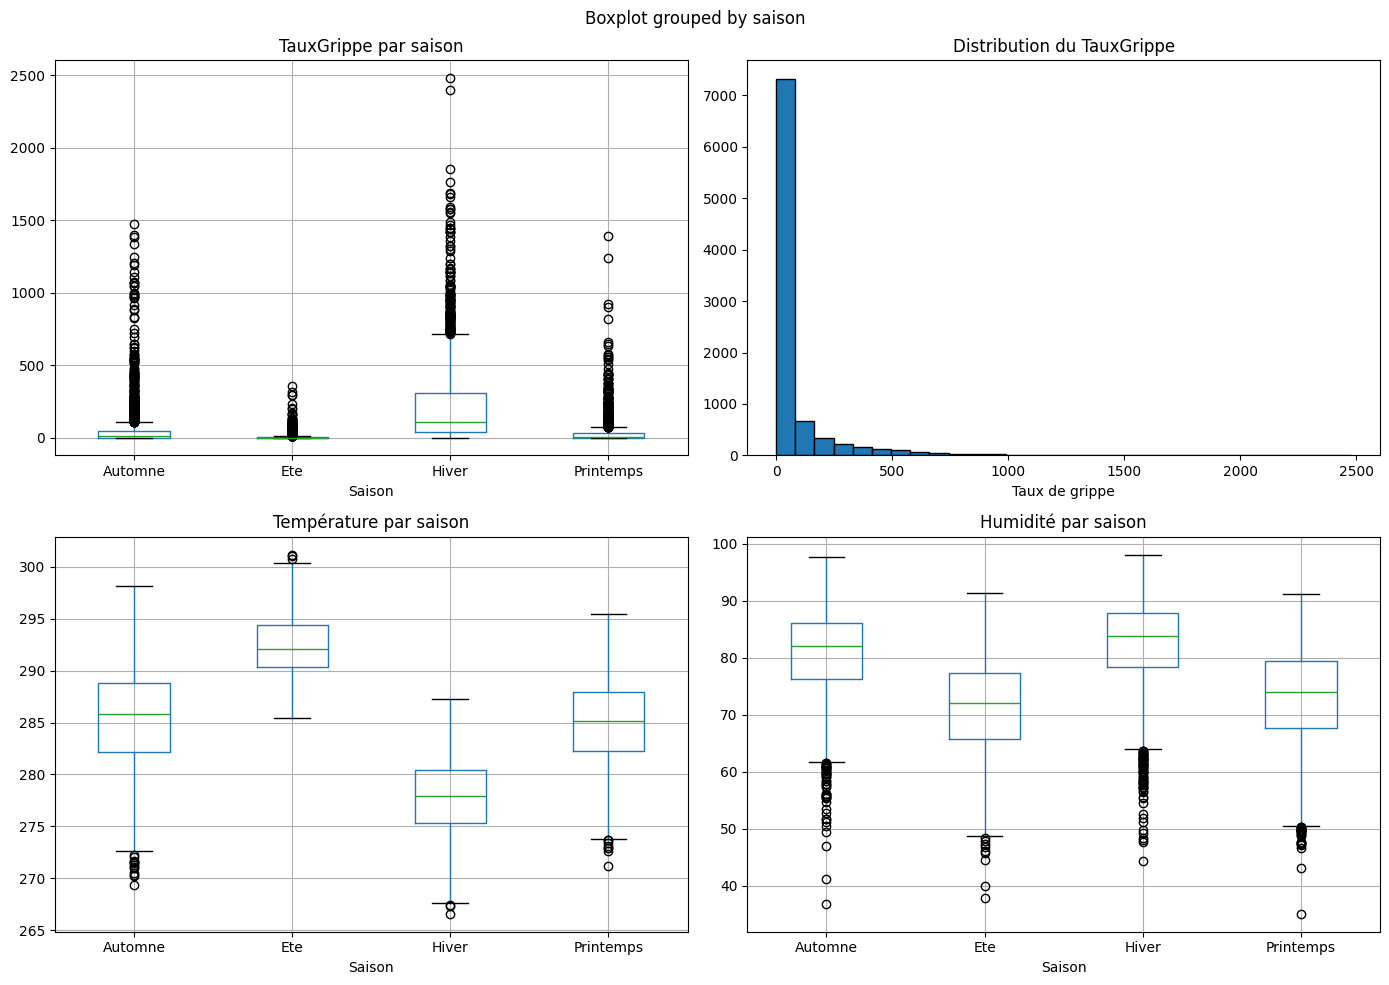


Boxplots affichés


In [11]:
import matplotlib.pyplot as plt

# Vérifier les valeurs négatives ou extrêmes
print("Analyse des valeurs aberrantes :")
print(f"TauxGrippe - Min: {df_clean['TauxGrippe'].min()}, Max: {df_clean['TauxGrippe'].max()}")

# Identifier les outliers pour TauxGrippe avec méthode IQR
Q1 = df_clean['TauxGrippe'].quantile(0.25)
Q3 = df_clean['TauxGrippe'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['TauxGrippe'] < lower_bound) | (df_clean['TauxGrippe'] > upper_bound)]
print(f"\nOutliers détectés (TauxGrippe) : {len(outliers)} lignes")
print(f"Limites IQR : [{lower_bound:.2f}, {upper_bound:.2f}]")

if len(outliers) > 0:
    print("\nExemples d'outliers :")
    print(outliers[['date', 'region_name', 'TauxGrippe']].head())

# Créer un boxplot pour visualiser
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot TauxGrippe par saison
df_clean.boxplot(column='TauxGrippe', by='saison', ax=axes[0, 0])
axes[0, 0].set_title('TauxGrippe par saison')
axes[0, 0].set_xlabel('Saison')

# Distribution TauxGrippe
axes[0, 1].hist(df_clean['TauxGrippe'], bins=30, edgecolor='black')
axes[0, 1].set_title('Distribution du TauxGrippe')
axes[0, 1].set_xlabel('Taux de grippe')

# Boxplot variables météo
df_clean.boxplot(column='t', by='saison', ax=axes[1, 0])
axes[1, 0].set_title('Température par saison')
axes[1, 0].set_xlabel('Saison')

# Boxplot humidité
df_clean.boxplot(column='u', by='saison', ax=axes[1, 1])
axes[1, 1].set_title('Humidité par saison')
axes[1, 1].set_xlabel('Saison')

plt.tight_layout()
plt.show()

print("\nBoxplots affichés")

## TauxGrippe par saison

Hiver : taux beaucoup plus élevé (médiane ~200-300, pic à 2500)

Automne & Printemps : taux modérés (médiane ~50-100)

Été : taux très bas (médiane proche de 0)

C'est logique : la grippe circule davantage en hiver

On normalise / standardise les données

In [12]:
from sklearn.preprocessing import StandardScaler

# Créer une copie avec les variables standardisées
df_scaled = df_clean.copy()

# Sélectionner les colonnes numériques à standardiser (sauf IDs et la cible)
cols_to_scale = [col for col in df_clean.select_dtypes(include=[np.number]).columns 
                 if col not in ['Id', 'week_year', 'region_code']]

scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

print(f"\nMoyenne après standardisation (doit être ~0) :")
print(df_scaled[cols_to_scale].mean().round(10))
print(f"\nEcart-type après standardisation (doit être ~1) :")
print(df_scaled[cols_to_scale].std().round(2))


Moyenne après standardisation (doit être ~0) :
TauxGrippe    0.0
tend         -0.0
dd            0.0
ff            0.0
t             0.0
td           -0.0
u            -0.0
vv           -0.0
n            -0.0
nbas         -0.0
hbas          0.0
pres          0.0
tn12         -0.0
tx12          0.0
tminsol       0.0
rafper        0.0
per          -0.0
ht_neige     -0.0
ssfrai       -0.0
perssfrai    -0.0
rr1          -0.0
rr3          -0.0
rr6           0.0
rr12          0.0
rr24         -0.0
dtype: float64

Ecart-type après standardisation (doit être ~1) :
TauxGrippe    1.0
tend          1.0
dd            1.0
ff            1.0
t             1.0
td            1.0
u             1.0
vv            1.0
n             1.0
nbas          1.0
hbas          1.0
pres          1.0
tn12          1.0
tx12          1.0
tminsol       1.0
rafper        1.0
per           1.0
ht_neige      1.0
ssfrai        1.0
perssfrai     1.0
rr1           1.0
rr3           1.0
rr6           1.0
rr12          1.0
rr24

ON A DEUX DATA SET SUR LESQUELS IL FAUT QU'ON TESTE : 
1. full : train_synop_cleaned_full_variables.csv
2. 15 var : dataset_reduit_variables_selectionnees.csv

In [ ]:
df_full = pd.read_csv('train_synop_cleaned_full_variables.csv')
df_reduit = pd.read_csv('dataset_reduit_variables_selectionnees.csv')

print(df_full.head())


on intègre les données externes (Google Trends, transports, âge)

In [13]:
import glob
import os

# 1. Charger les données Google Trends
print("Chargement des données Google Trends...")
google_files = glob.glob('RequetesGoogleParRegion/*.csv')
print(f"Fichiers Google Trends trouvés : {len(google_files)}")

# Créer un mapping région -> fichier Google Trends
region_google_map = {}
for file in google_files:
    region_name = os.path.basename(file).replace('.csv', '')
    region_google_map[region_name] = file
    print(f"  {region_name}")

# Charger et fusionner les données Google Trends
google_data_list = []
for region_name, file_path in region_google_map.items():
    try:
        gt = pd.read_csv(file_path, sep=';')
        # Supposer qu'il y a une colonne de semaine/date à mapper
        print(f"  {region_name} : {gt.shape}")
        google_data_list.append((region_name, gt))
    except Exception as e:
        print(f"  Erreur lecture {region_name} : {e}")

print(f"\nDonnées Google Trends chargées : {len(google_data_list)} régions")

# REMARQUE : À ce stade, il faudrait aligner les semaines avec df_clean
# Pour le moment, affichage de la structure
if google_data_list:
    print(f"\nExemple structure Google Trends ({google_data_list[0][0]}) :")
    print(google_data_list[0][1].head())
    print(f"Colonnes : {google_data_list[0][1].columns.tolist()}")

print("\nNote : L'intégration complète des données Google Trends nécessite")
print("      d'aligner les semaines et de fusionner avec df_clean")

Chargement des données Google Trends...
Fichiers Google Trends trouvés : 22
  BasseNormandie
  CentreValdeLoire
  Aquitaine
  Lorraine
  LanguedocRoussillon
  HauteNormandie
  Auvergne
  Picardie
  MidiPyrenees
  PaysdelaLoire
  Alsace
  Limousin
  PoitouCharentes
  Bretagne
  Corse
  ChampagneArdenne
  RhoneAlpes
  ProvenceAlpesCotedAzur
  NordPasdeCalais
  Bourgogne
  IledeFrance
  FrancheComte
  BasseNormandie : (155, 1)
  CentreValdeLoire : (155, 1)
  Aquitaine : (155, 1)
  Lorraine : (155, 1)
  LanguedocRoussillon : (155, 1)
  HauteNormandie : (155, 1)
  Auvergne : (155, 1)
  Picardie : (155, 1)
  MidiPyrenees : (155, 1)
  PaysdelaLoire : (155, 1)
  Alsace : (155, 1)
  Limousin : (155, 1)
  PoitouCharentes : (155, 1)
  Bretagne : (155, 1)
  Corse : (155, 1)
  ChampagneArdenne : (155, 1)
  RhoneAlpes : (155, 1)
  ProvenceAlpesCotedAzur : (155, 1)
  NordPasdeCalais : (155, 1)
  Bourgogne : (155, 1)
  IledeFrance : (155, 1)
  FrancheComte : (155, 1)

Données Google Trends chargées : 

on créé  des features temporelles (lags et moyennes mobiles)

In [14]:
# Créer les lags pour le TauxGrippe (t-1, t-2, t-3, t-4)
# Important : trier d'abord par région et par semaine

df_lags = df_clean.sort_values(['region_code', 'week_year']).reset_index(drop=True).copy()

# Créer les lags par région
for lag in [1, 2, 3, 4]:
    df_lags[f'TauxGrippe_lag{lag}'] = (
        df_lags.groupby('region_code', sort=False)['TauxGrippe'].shift(lag)
    )

print("Creation des lags du TauxGrippe :")
print(f"Colonnes de lag créées : TauxGrippe_lag1, lag2, lag3, lag4")

# Créer des moyennes mobiles (4 semaines, 8 semaines)
for window in [4, 8]:
    df_lags[f'TauxGrippe_ma{window}'] = (
        df_lags.groupby('region_code', sort=False)['TauxGrippe'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean()
        )
    )

print(f"\nCreation des moyennes mobiles :")
print(f"Colonnes créées : TauxGrippe_ma4, TauxGrippe_ma8")

# Afficher un aperçu d'une région
first_region = df_lags['region_code'].iloc[0]
sample_region = df_lags[df_lags['region_code'] == first_region].head(10)

print(f"\nAperçu (région {first_region}) :")
print(sample_region[['date', 'region_name', 'TauxGrippe', 'TauxGrippe_lag1', 'TauxGrippe_lag2']].to_string())

print(f"\nAperçu moyennes mobiles :")
print(sample_region[['date', 'TauxGrippe', 'TauxGrippe_ma4', 'TauxGrippe_ma8']].to_string())

print(f"\nShape après ajout des lags et moyennes mobiles : {df_lags.shape}")
print(f"Nouvelles colonnes : {[col for col in df_lags.columns if 'lag' in col or 'ma' in col]}")

Creation des lags du TauxGrippe :
Colonnes de lag créées : TauxGrippe_lag1, lag2, lag3, lag4

Creation des moyennes mobiles :
Colonnes créées : TauxGrippe_ma4, TauxGrippe_ma8

Aperçu (région 11) :
        date    region_name  TauxGrippe  TauxGrippe_lag1  TauxGrippe_lag2
0 2003-12-29  ILE-DE-FRANCE          66              NaN              NaN
1 2004-01-05  ILE-DE-FRANCE          74             66.0              NaN
2 2004-01-12  ILE-DE-FRANCE          88             74.0             66.0
3 2004-01-19  ILE-DE-FRANCE          26             88.0             74.0
4 2004-01-26  ILE-DE-FRANCE          17             26.0             88.0
5 2004-02-02  ILE-DE-FRANCE          25             17.0             26.0
6 2004-02-09  ILE-DE-FRANCE          22             25.0             17.0
7 2004-02-16  ILE-DE-FRANCE           4             22.0             25.0
8 2004-02-23  ILE-DE-FRANCE           2              4.0             22.0
9 2004-03-01  ILE-DE-FRANCE          28              2.0       

## 12. Sauvegarde finale des datasets préparés

In [15]:
print("\n" + "="*80)
print("SAUVEGARDE FINALE DES DATASETS")
print("="*80)

# 1. Dataset complet (toutes les variables)
df_clean.to_csv('train_synop_cleaned_complet.csv', index=False)
print("\n1. Dataset complet (toutes variables) :")
print(f"   Fichier : train_synop_cleaned_complet.csv")
print(f"   Shape : {df_clean.shape}")
print(f"   Colonnes : {len(df_clean.columns)}")

# 2. Dataset réduit (variables sélectionnées)
df_reduit.to_csv('train_synop_cleaned_reduit.csv', index=False)
print("\n2. Dataset réduit (variables sélectionnées) :")
print(f"   Fichier : train_synop_cleaned_reduit.csv")
print(f"   Shape : {df_reduit.shape}")
print(f"   Colonnes : {df_reduit.columns.tolist()}")

# 3. Dataset avec données standardisées (complet)
df_scaled_reduit = df_reduit.copy()
cols_to_scale_reduit = [col for col in df_reduit.select_dtypes(include=[np.number]).columns 
                        if col not in ['Id', 'week_year', 'region_code', 'TauxGrippe']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_reduit[cols_to_scale_reduit] = scaler.fit_transform(df_reduit[cols_to_scale_reduit])

df_scaled_reduit.to_csv('train_synop_scaled_reduit.csv', index=False)
print("\n3. Dataset réduit + standardisé :")
print(f"   Fichier : train_synop_scaled_reduit.csv")
print(f"   Shape : {df_scaled_reduit.shape}")

# 4. Dataset avec lags et moyennes mobiles (réduit)
df_lags_reduit = df_reduit.sort_values(['region_code', 'week_year']).reset_index(drop=True).copy()

for lag in [1, 2, 3, 4]:
    df_lags_reduit[f'TauxGrippe_lag{lag}'] = (
        df_lags_reduit.groupby('region_code', sort=False)['TauxGrippe'].shift(lag)
    )

for window in [4, 8]:
    df_lags_reduit[f'TauxGrippe_ma{window}'] = (
        df_lags_reduit.groupby('region_code', sort=False)['TauxGrippe'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean()
        )
    )

df_lags_reduit.to_csv('train_synop_with_lags_reduit.csv', index=False)
print("\n4. Dataset réduit + lags + moyennes mobiles :")
print(f"   Fichier : train_synop_with_lags_reduit.csv")
print(f"   Shape : {df_lags_reduit.shape}")
print(f"   Features temporelles : {[col for col in df_lags_reduit.columns if 'lag' in col or 'ma' in col]}")

print("\n" + "="*80)
print("RESUME FINAL")
print("="*80)
print(f"\nDatasets créés :")
print(f"  - train_synop_cleaned_complet.csv : {df_clean.shape[0]} lignes x {df_clean.shape[1]} colonnes")
print(f"  - train_synop_cleaned_reduit.csv : {df_reduit.shape[0]} lignes x {df_reduit.shape[1]} colonnes")
print(f"  - train_synop_scaled_reduit.csv : {df_scaled_reduit.shape[0]} lignes x {df_scaled_reduit.shape[1]} colonnes")
print(f"  - train_synop_with_lags_reduit.csv : {df_lags_reduit.shape[0]} lignes x {df_lags_reduit.shape[1]} colonnes")

print(f"\nVariables sélectionnées ({len(variables_disponibles)}) :")
print(f"  {variables_disponibles}")

print(f"\nPeriode couverte : {df_clean['date'].min().date()} à {df_clean['date'].max().date()}")
print(f"Régions : {df_clean['region_code'].nunique()}")
print(f"Total observations : {len(df_clean)}")


SAUVEGARDE FINALE DES DATASETS

1. Dataset complet (toutes variables) :
   Fichier : train_synop_cleaned_complet.csv
   Shape : (9195, 31)
   Colonnes : 31


NameError: name 'df_reduit' is not defined